# Feed Forward Neural Networks

In [9]:
# import libraries
import numpy as np
import pandas as pd
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Device Configuration

In [4]:
# run on GPU, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Setting Hyperparameters

In [224]:
input_size = 28*28 #784
hidden_layer1_size = 28*4
hidden_layer2_size = 28
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

## Manage Dataset

In [87]:
# load traning dataset
train_dataset = torchvision.datasets.MNIST(
    root = './data/handigits/train',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

# load testing dataset
test_dataset = torchvision.datasets.MNIST(
    root = './data/handigits/test',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [182]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/handigits/train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [183]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/handigits/test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [184]:
# training loader 
train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = batch_size,
    shuffle = True
)

# testing loader 
test_loader = DataLoader(
    dataset = test_dataset,
    batch_size = 10000,
    shuffle = False
)

## See Dataset

In [89]:
iter_num = 0
for images, labels in iter(train_loader):
    print(images.shape, labels.shape)
    break

torch.Size([100, 1, 28, 28]) torch.Size([100])


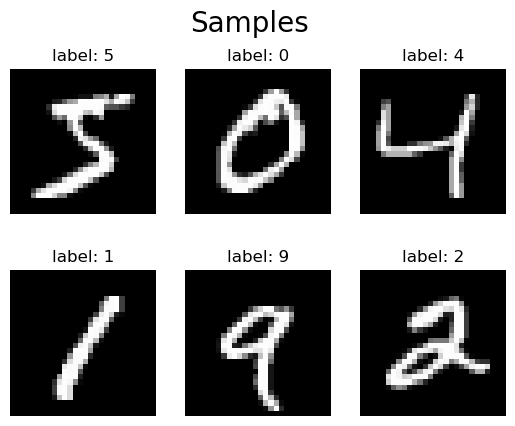

In [201]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_loader.dataset[i][0].reshape(28, 28),
               cmap = 'grey')
    plt.title(f"label: {train_loader.dataset[i][1]}")
    plt.axis("off")
plt.suptitle("Samples", size=20)
plt.show()

## Configure Models

In [125]:
class NeuralNet(nn.Module):
    # define initialization
    def __init__(self,
                 input_size = input_size,
                 hidden_layer1_size = hidden_layer1_size,
                 hidden_layer2_size = hidden_layer2_size,
                 num_classes = num_classes):

        # initialize nn.Module base class
        super().__init__()

        # initialize NeuralNet attributes
        self.relu = nn.ReLU()
        self.l1   = nn.Linear(input_size, hidden_layer1_size)
        self.l2   = nn.Linear(hidden_layer1_size, hidden_layer2_size)
        self.l3   = nn.Linear(hidden_layer2_size, num_classes)

    # forward pass
    def forward(self, X):
        out = self.relu(self.l1(X))
        out = self.relu(self.l2(out))
        out = self.relu(self.l3(out))
        return out

# create model
model = NeuralNet()

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## Training Loop

In [225]:
print_batches = 200
loss_records = []

# print training stars
print("Training Started")

# iterate over epochs
for epoch in range(num_epochs):
   
    # iterate over bathces
    for i, (images, labels) in enumerate(train_loader):

        # convert the shape of images and move it to device
        images = images.reshape(-1, 784).to(device)
        labels = labels.to(device)

        # forward calculation
        outputs = model.forward(images)
        loss = criterion(outputs, labels)

        # record loss on every epoch
        loss_records.append(loss.item())
        
        # compute gradient
        loss.backward()
        optimizer.step()

        # empty gradient
        optimizer.zero_grad()

        # print training repost for each batches
        if (i+1) % print_batches == 0:
            print(f"epochs: {epoch+1}/{num_epochs}, batch: {i+1}/{len(train_loader)}, loss: {loss :.4f}")


# print training ends
print("Training ends")

Training Started
epochs: 1/10, batch: 200/600, loss: 0.2534
epochs: 1/10, batch: 400/600, loss: 0.2919
epochs: 1/10, batch: 600/600, loss: 0.2827
epochs: 2/10, batch: 200/600, loss: 0.2221
epochs: 2/10, batch: 400/600, loss: 0.2077
epochs: 2/10, batch: 600/600, loss: 0.1394
epochs: 3/10, batch: 200/600, loss: 0.1621
epochs: 3/10, batch: 400/600, loss: 0.1883
epochs: 3/10, batch: 600/600, loss: 0.2715
epochs: 4/10, batch: 200/600, loss: 0.2356
epochs: 4/10, batch: 400/600, loss: 0.1614
epochs: 4/10, batch: 600/600, loss: 0.2308
epochs: 5/10, batch: 200/600, loss: 0.1843
epochs: 5/10, batch: 400/600, loss: 0.2994
epochs: 5/10, batch: 600/600, loss: 0.3001
epochs: 6/10, batch: 200/600, loss: 0.2109
epochs: 6/10, batch: 400/600, loss: 0.2613
epochs: 6/10, batch: 600/600, loss: 0.2350
epochs: 7/10, batch: 200/600, loss: 0.1153
epochs: 7/10, batch: 400/600, loss: 0.2079
epochs: 7/10, batch: 600/600, loss: 0.3003
epochs: 8/10, batch: 200/600, loss: 0.2763
epochs: 8/10, batch: 400/600, loss: 0

## Test Model Performances

In [226]:
with torch.no_grad():
    for images, labels in iter(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        y = labels.numpy()
        
        test_outputs = model(images)
        _, predictions = torch.max(test_outputs, 1)
        y_pred = predictions.numpy()

## Evaluate Models

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [228]:
print(classification_report(y, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.49      0.99      0.66       980
           1       0.99      0.99      0.99      1135
           2       0.00      0.00      0.00      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.88     10000
   macro avg       0.83      0.88      0.85     10000
weighted avg       0.83      0.88      0.85     10000



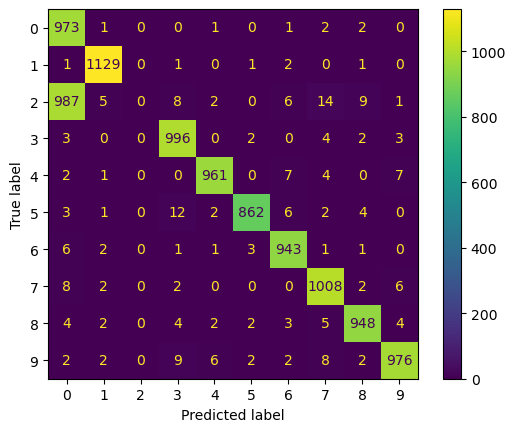

In [229]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm
)
disp.plot()